In [ ]:
# Install necesssary libraries
%pip install gym
%pip install gym[atari]
%pip install gym[accept-rom-license]
%pip install keyboard

In [2]:
# Import dependencies
import gym
import keyboard
import matplotlib.pyplot as plt

In [3]:
# Initialize and reset the Breakout
env =  gym.make("ALE/Breakout-v5",
                full_action_space=False,
                repeat_action_probability=0.1,
                obs_type='rgb')

(210, 160, 3)


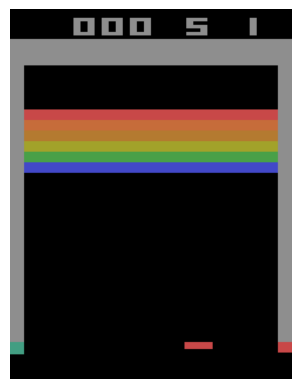

In [4]:
start_state, info = env.reset()

print(start_state.shape)
plt.imshow(start_state)
plt.axis(False);

In [5]:
print(f"Number of possible actions: {env.action_space.n}")
print(f"Action meanings: {env.unwrapped.get_action_meanings()}")

Number of possible actions: 4
Action meanings: ['NOOP', 'FIRE', 'RIGHT', 'LEFT']


In [6]:
obs, reward, terminated, truncated, info = env.step(3)
obs.shape

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


(210, 160, 3)

(210, 160, 3)


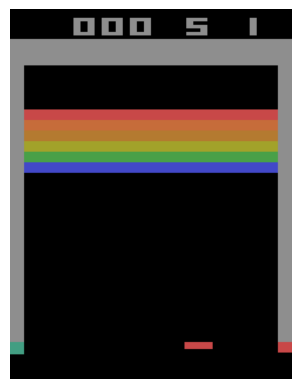

In [8]:
import tensorflow as tf

start_state, info = env.reset()

print(start_state.shape)
plt.imshow(start_state)
plt.axis(False);

### Environment Exploration

In [1]:
# Initialize and reset the Breakout
env =  gym.make("ALE/Breakout-v5",
                full_action_space=False,
                repeat_action_probability=0.1,
                obs_type='rgb')

env.reset();

NameError: name 'gym' is not defined

In [23]:
print(f"Number of possible actions: {env.action_space.n}")
print(f"Action meanings: {env.unwrapped.get_action_meanings()}")

Number of possible actions: 4
Action meanings: ['NOOP', 'FIRE', 'RIGHT', 'LEFT']


c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


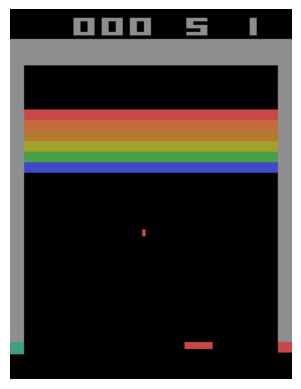

In [24]:
# Get start state
obs, reward, terminated, truncated, info = env.step(1)
plt.imshow(obs)
plt.axis(False);

In [ ]:
# # Play game

# keyToAction = {
#     'd': 2, # move right
#     'a': 3, # move left
#     'w': 0, # no action
#     'r': 1, # start game after losing a life, no effect during the game
# }

# while True:
#     inp = keyboard.read_event()    
#     if keyToAction.get(inp.name, -1) == -1:
#         env.close()
        
#     obs, reward, terminated, truncated, info = env.step(keyToAction[inp.name])
#     env.render()

In [7]:
# Initialize the Breakout environment
env = gym.make("ALE/Breakout-v5",
                full_action_space=False,
                repeat_action_probability=0.1,
                obs_type='rgb')

In [15]:
start_state, info = env.reset()
start_state.shape

# obs, reward, terminated, truncated, info = env.step()

(210, 160, 3)

In [11]:
start_state.shape

(210, 160, 3)

In [9]:
# Import dependencies
import gym
import tensorflow as tf


class ImageTransformer:
    def transform(self, img):
        print(img.shape)
        img = tf.image.rgb_to_grayscale(img)
        print(img.shape)


if __name__ == "__main__":
    # Initialize the Breakout environment
    env = gym.make(
        id="ALE/Breakout-v5",
        full_action_space=False,
        repeat_action_probability=0.1,
        obs_type="rgb",
    )
    start_state, info = env.reset()

    # print(start_state.shape)
    # print(info)

    tf = ImageTransformer()
    tf.transform(start_state)


(210, 160, 3)


AttributeError: 'ImageTransformer' object has no attribute 'image'

In [7]:
import tensorflow as tf

In [8]:
original = tf.constant([[[1.0, 2.0, 3.0]]])
converted = tf.image.rgb_to_grayscale(original)
converted


<tf.Tensor: shape=(1, 1, 1), dtype=float32, numpy=array([[[1.8149]]], dtype=float32)>

In [9]:
# Import dependencies
import gym
import tensorflow as tf


class ImageTransformer:
    def transform(self, img):
        print(img.shape)
        img = tf.image.rgb_to_grayscale(tf.expand_dims(img, axis=0))
        print(img.shape)



# Initialize the Breakout environment
env = gym.make(
    id="ALE/Breakout-v5",
    full_action_space=False,
    repeat_action_probability=0.1,
)
start_state, info = env.reset()

# print(start_state.shape)
# print(info)

tf = ImageTransformer()
tf.transform(start_state)


(210, 160, 3)


AttributeError: 'ImageTransformer' object has no attribute 'image'

2.15.0
shape before: (210, 160, 3)


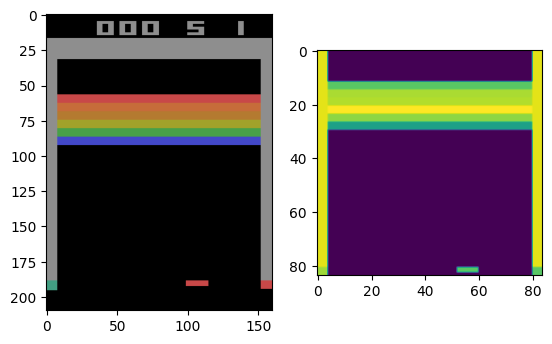

shape after: (84, 84, 1)
tf.Tensor(
[[[142]
  [142]
  [142]
  ...
  [142]
  [142]
  [142]]

 [[142]
  [142]
  [142]
  ...
  [142]
  [142]
  [142]]

 [[142]
  [142]
  [142]
  ...
  [142]
  [142]
  [142]]

 ...

 [[127]
  [127]
  [127]
  ...
  [110]
  [110]
  [110]]

 [[127]
  [127]
  [127]
  ...
  [110]
  [110]
  [110]]

 [[127]
  [127]
  [127]
  ...
  [110]
  [110]
  [110]]], shape=(84, 84, 1), dtype=uint8)


In [16]:
# Import dependencies
import gym
import tensorflow as tf

import matplotlib.pyplot as plt


class ImageTransformer:
    def transform(self, img):
        plt.subplot(1, 2, 1)
        plt.imshow(img)
        print(f"shape before: {img.shape}")
        img = tf.image.rgb_to_grayscale(img)
        img = tf.image.crop_to_bounding_box(img, 35,0,160,160)
        img = tf.image.resize(
            img,
            size=(84, 84),
            method=tf.image.ResizeMethod.NEAREST_NEIGHBOR,
        )
        img = img/255.
        plt.subplot(1, 2, 2)
        plt.imshow(img)
        plt.show()
        print(f"shape after: {img.shape}")
        print(img)


if __name__ == "__main__":
    print(tf.__version__)
    # Initialize the Breakout environment
    env = gym.make(
        id="ALE/Breakout-v5",
        full_action_space=False,
        repeat_action_probability=0.1,
        obs_type="rgb",
    )
    start_state, info = env.reset()

    # print(start_state.shape)
    # print(info)

    imgT = ImageTransformer()
    imgT.transform(start_state)
